# FIRST EXCLUSIVELY NUMERICAL MODEL #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [2]:
# read in csv
df = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')
pd.options.display.max_columns = 999
df = df.reindex(sorted(df.columns), axis=1)
df_test = df_test.reindex(sorted(df_test.columns), axis=1)
df.drop([960, 1885], inplace=True)

In [3]:
df.isnull().sum().sort_values()

1st Flr SF            0
MS Zoning             0
MS SubClass           0
Low Qual Fin SF       0
Lot Shape             0
                   ... 
Fireplace Qu       1000
Fence              1649
Alley              1909
Misc Feature       1985
Pool QC            2041
Length: 81, dtype: int64

In [4]:
#replaced 14 of 26 features with NaN to NA as in data dictionary

df = df.fillna({'Pool QC': 'NA',
           'Misc Feature': 'NA',
           'Alley': 'NA',
           'Fence': 'NA',
           'Fireplace Qu': 'NA',
           'Garage Finish': 'NA',
           'Garage Qual': 'NA',
           'Garage Cond': 'NA',
           'Garage Type': 'NA',
           'Bsmt Exposure': 'NA',
           'BsmtFin Type 2': 'NA',
           'BsmtFin Type 1': 'NA',
           'Bsmt Cond': 'NA',
           'Bsmt Qual': 'NA',
           'Mas Vnr Type': 'NA',
           'Electrical': 'NA',
})
df_test = df_test.fillna({'Pool QC': 'NA',
           'Misc Feature': 'NA',
           'Alley': 'NA',
           'Fence': 'NA',
           'Fireplace Qu': 'NA',
           'Garage Finish': 'NA',
           'Garage Qual': 'NA',
           'Garage Cond': 'NA',
           'Garage Type': 'NA',
           'Bsmt Exposure': 'NA',
           'BsmtFin Type 2': 'NA',
           'BsmtFin Type 1': 'NA',
           'Bsmt Cond': 'NA',
           'Bsmt Qual': 'NA',
           'Mas Vnr Type': 'NA',
           'Electrical': 'NA',
})

In [5]:
df.isnull().sum().sort_values()

1st Flr SF          0
Misc Feature        0
Mas Vnr Type        0
MS Zoning           0
MS SubClass         0
                 ... 
Bsmt Half Bath      2
Bsmt Full Bath      2
Mas Vnr Area       22
Garage Yr Blt     114
Lot Frontage      330
Length: 81, dtype: int64

In [6]:
feat_list = ['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Area', 'Garage Cars', 'Bsmt Unf SF', 'BsmtFin SF 2']
for feat in feat_list:
        df[feat].fillna(df[feat].mean(), inplace=True)

test_feat_list = ['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Area', 'Garage Cars', 'Bsmt Unf SF', 'BsmtFin SF 2']
for feat in test_feat_list:
        df_test[feat].fillna(df_test[feat].mean(), inplace=True)

In [7]:
df_test.isnull().sum().sort_values(ascending=False).head(12)

1st Flr SF         0
2nd Flr SF         0
Misc Val           0
Misc Feature       0
Mas Vnr Type       0
Mas Vnr Area       0
MS Zoning          0
MS SubClass        0
Low Qual Fin SF    0
Lot Shape          0
Lot Frontage       0
Lot Config         0
dtype: int64

In [8]:
#select only columns that are num, i.e. not 'object', set equal to variable
num_columns = df.dtypes[df.dtypes != 'object'].index

# select all null, set equal to variable
is_nulls = df.isnull().sum()

# select all not null, set equal to variable
not_null_columns = is_nulls[is_nulls==0].index
selected = df[not_null_columns & num_columns]
selected

/var/folders/nf/hqtqkkg54s75vy60jfg0jcp00000gn/T/ipykernel_67135/800236173.py:9: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  selected = df[not_null_columns & num_columns]


,1st Flr SF,2nd Flr SF,3Ssn Porch,Bedroom AbvGr,Bsmt Full Bath,Bsmt Half Bath,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,Enclosed Porch,Fireplaces,Full Bath,Garage Area,Garage Cars,Garage Yr Blt,Gr Liv Area,Half Bath,Id,Kitchen AbvGr,Lot Area,Lot Frontage,Low Qual Fin SF,MS SubClass,Mas Vnr Area,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Pool Area,SalePrice,Screen Porch,TotRms AbvGrd,Total Bsmt SF,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,3,0.0,0.0,192.0,533.0,0.0,0,0,2,475.0,2.0,1976.0,1479,1,109,1,13517,68.878999,0,60,289.0,0,3,44,8,6,533352170,0,130500,0,6,725.0,0,1976,2005,2010
1,913,1209,0,4,1.0,0.0,276.0,637.0,0.0,0,1,2,559.0,2.0,1997.0,2122,1,544,1,11492,43.000000,0,60,132.0,0,4,74,5,7,531379050,0,220000,0,8,913.0,0,1996,1997,2009
2,1057,0,0,3,1.0,0.0,326.0,731.0,0.0,0,0,1,246.0,1.0,1953.0,1057,0,153,1,7922,68.000000,0,20,0.0,0,1,52,7,5,535304180,0,109000,0,5,1057.0,0,1953,2007,2010
3,744,700,0,3,0.0,0.0,384.0,0.0,0.0,0,0,2,400.0,2.0,2007.0,1444,1,318,1,9802,73.000000,0,60,0.0,0,4,0,5,5,916386060,0,174000,0,7,384.0,100,2006,2007,2010
4,831,614,0,3,0.0,0.0,676.0,0.0,0.0,0,0,2,484.0,2.0,1957.0,1445,0,255,1,14235,82.000000,0,50,0.0,0,3,59,8,6,906425045,0,138500,0,6,676.0,0,1900,1993,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1728,0,0,3,1.0,0.0,873.0,1011.0,0.0,0,1,2,520.0,2.0,2007.0,1728,0,1587,1,11449,79.000000,0,20,0.0,0,1,276,5,8,921126030,0,298751,0,7,1884.0,0,2007,2007,2008
2047,861,0,0,1,0.0,0.0,599.0,262.0,0.0,0,0,1,539.0,2.0,1961.0,861,0,785,1,12342,68.878999,0,30,0.0,0,3,0,5,4,905377130,0,82500,0,4,861.0,158,1940,1950,2009
2048,1172,741,0,3,0.0,0.0,896.0,0.0,0.0,0,1,1,342.0,2.0,1929.0,1913,1,916,1,7558,57.000000,0,50,0.0,0,3,0,6,6,909253010,0,177000,0,9,896.0,0,1928,1950,2009
2049,1200,0,0,3,1.0,0.0,295.0,155.0,750.0,140,2,1,294.0,1.0,1956.0,1200,0,639,1,10400,80.000000,0,20,0.0,0,11,189,5,4,535179160,0,144000,0,6,1200.0,0,1956,1956,2009


In [9]:
#SAVED CSV FOR FUTURE ITERATION ON SIMPLE SET
#selected.to_csv('./datasets/Working Data/numericals.csv')

In [10]:
#set X, y
#selected is dataframe, remove 'SalePrice'
X = selected.drop(columns='SalePrice')
features = X.columns
y = df['SalePrice']
#instantiate
lr = LinearRegression()

In [11]:
#baseline cross val to see if it makes sense to continue or adjust
cross_val_score(lr,X,y).mean()
#"86.8% of variance in y is explained in the model" not a bad score, I'll proceed

0.867797759222614

In [12]:
# train test split 'val' is stand-in for test because test_dataset exists also
#random_state @ 33, train/test split@ 70/30

X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=33)

# fit the model
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
#train score
lr.score(X_train, y_train)

0.882705662437271

In [14]:
#test score
lr.score(X_val, y_val)

0.849847790362806

In [15]:
cross_val_score(lr,X_train,y_train).mean()

0.8735578502988611

 ASSESS:
 - train score = 88.3
 - test score = 84.9
 - cross_val score = 87.3
 looks like low variance, low on bias 

In [16]:
# make predictions
pred = lr.predict(X)
pred

array([182915.3895175 , 235737.49405257, 124779.66559622, ...,
       160417.0661251 , 120799.43577271, 202668.63901942])

In [17]:
#residuals 
residuals = y-pred
residuals

0      -52415.389518
1      -15737.494053
2      -15779.665596
3       32707.161074
4        2152.682657
            ...     
2046    23539.002114
2047   -13504.939528
2048    16582.933875
2049    23200.564227
2050   -13668.639019
Name: SalePrice, Length: 2049, dtype: float64

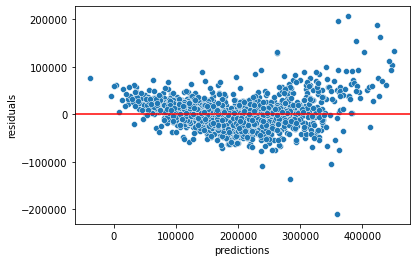

In [18]:
plt.axhline(y=0, color='r')
sns.scatterplot(x=pred, y=residuals)
('Residual Plot to Show error - Epsilon')
plt.xlabel('predictions')
plt.ylabel('residuals');

-130.93974606659702

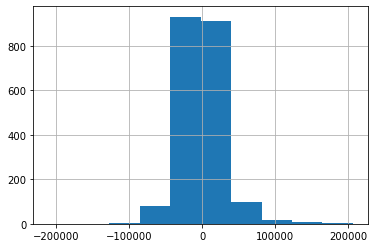

In [19]:
residuals.hist();
residuals.mean()

In [20]:
#make preds on test
test_preds = lr.predict(df_test[features])
#test_preds.shape

#create target column 'SalePrice' in df_test
df_test['SalePrice'] = test_preds

#create df for submission with only Id and SalePrice
submission = df_test[['Id', 'SalePrice']]

submission.set_index('Id', inplace=True)
submission.head()

,SalePrice
Id,
2658,138317.015694
2718,158342.356115
2414,206272.555664
1989,109489.544531
625,190580.404175


In [21]:
#submission.to_csv('./datasets/Kaggle Submissions/-130, good fit - .csv')

In [22]:
#what's my RMSE?
np.sqrt(metrics.mean_squared_error(y, pred))

27966.66009272617